# Backpropagation y Autogradient

1. [Pytorch Autograd Engine](https://pytorch.org/blog/overview-of-pytorch-autograd-engine/)

2. [Como se construyen los grafos computacionales en Pytorch](https://pytorch.org/blog/computational-graphs-constructed-in-pytorch/)

3. [Como se ejecutan los grafos computacionales en Pytorch](https://pytorch.org/blog/how-computational-graphs-are-executed-in-pytorch/)

## Calculo automatico del gradiente:

## y = x^2

In [ ]:
import torch 
x = torch.tensor([[2.0]], requires_grad=True)
y = x**2
y.backward()
print(x.grad)

## Un poco mas complejo (grafos de calculos):

## f = (x + y) * z 

#### lo podemos escribir: f = q * z donde q = x + y
 
![image](img/backprop.png)

#### Entradas:
```
x = -2; y = 5; z = -4
```

#### Paso hacia adelante:
```
q = x + y   --->   3 

f = q * z   --->   3 * -4 = -12 
```

#### Primer paso del backprop: f = q * z
```
df/dz = q   --->   3

df/dq = z   --->   -4
```

#### Segundo paso del backprop: q = x + y
```
df/dx = df/dq * dq/dx   --->   z * 1 = -4

df/dy = df/dq * dq/dy   --->   z * 1 = -4
```

In [14]:
x = torch.tensor([[-2.0]], requires_grad=True)
y = torch.tensor([[5.0]], requires_grad=True)
z = torch.tensor([[-4.0]], requires_grad=True)
q = x + y 
f = q * z 
f.backward()     # calculo automatico del gradiente

print(z.grad)    #df/dz = q => x + y = 3 

print(x.grad)    #df/dx = df/dq * dq/dx = z * 1 = -4
print(y.grad)    #df/dy = df/dq * dq/dy = z * 1 = -4

tensor([[3.]])
tensor([[-4.]])
tensor([[-4.]])


### Usemos esto para realizar una Regresion Logistica

Utilizando la tecnica del gradiente descendiente en grafos computacionales con autogradiente intentaremos adivinar si a una persona que le damos un prestamo nos devolvera el dinero implementando una regresion logistica en pytorch.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({"Salario":[1500,600,1800,700,1400,3100,2900,4200,5100,4500],
                  "Ahorro": [11000,5700,1500,7100,4900,11000,13000,14000,18000,16000],
                  "Devolvio":[0,0,0,0,0,1,1,1,1,1]})

In [3]:
df.head()

,Salario,Ahorro,Devolvio
0,1500,11000,0
1,600,5700,0
2,1800,1500,0
3,700,7100,0
4,1400,4900,0


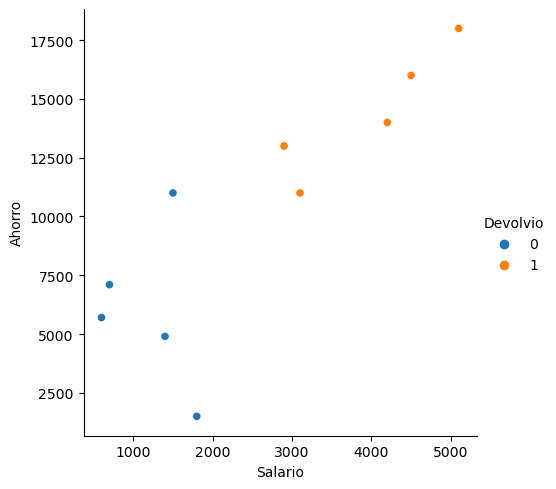

In [4]:
sns.relplot(x="Salario", y="Ahorro", hue="Devolvio", data=df);

#### Con PyTorch

In [5]:
import torch
from torch.autograd import Variable
from torch.nn import functional as F

In [6]:
x = df.loc[:,["Salario","Ahorro"]].to_numpy()
x[:,0] = x[:,0]/ 1000
x[:,1] = x[:,1]/ 10000
y = df.loc[:,["Devolvio"]].to_numpy()

In [7]:
x_data = Variable(torch.Tensor(x))
y_data = Variable(torch.Tensor(y))

In [8]:
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(2, 1)
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x)) # sigmoid(X * W + b)
        return y_pred
model = LogisticRegression()

In [9]:
criterion = torch.nn.BCELoss()

In [10]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [11]:
for epoch in range(500):
    model.train()
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_data)
    # Compute Loss
    loss = criterion(y_pred, y_data)
    if epoch%100 == 0: print(f"costo:{loss}")
    # Backward pass
    loss.backward()
    optimizer.step()

costo:0.6814820766448975
costo:0.31258729100227356
costo:0.20890073478221893
costo:0.16212354600429535
costo:0.13511288166046143


In [12]:
new_x = Variable(torch.Tensor([[3_000/1_000,15_000/10_000]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred)

predicted Y value:  tensor([[0.9568]], grad_fn=<SigmoidBackward0>)


In [13]:
new_x = Variable(torch.Tensor([[900/1_000,8_000/10_000]]))
y_pred = model(new_x)
print("predicted Y value: ", y_pred)

predicted Y value:  tensor([[0.1982]], grad_fn=<SigmoidBackward0>)


# Fin: [Volver al contenido del curso](https://www.freecodingtour.com/cursos/espanol/deeplearning/deeplearning.html)